In [5]:
#CatBoost pretrained model

In [2]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
 
loaded_model = CatBoostRegressor()
loaded_model.load_model('catboost_model.cbm')

# Read and clean the new data for prediction
new_data = pd.read_csv('clean_Li_data_for_prediction_3000_features.csv')
new_materials = new_data['material']
new_data = new_data.drop('material', axis=1)

# Create a StandardScaler object (make sure to use the same scaler used during training)
scaler = StandardScaler()

# Scale the new data using the same scaler
new_data_scaled = scaler.fit_transform(new_data)  # Use fit_transform if you don't have training data

# Make predictions on the new data using the loaded model
new_data_predictions = loaded_model.predict(new_data_scaled)

# Save the predictions to a new CSV file
new_data_results = pd.DataFrame({'Material': new_materials, 'Predicted log Conductivity': new_data_predictions})
new_data_results.to_csv('predicted-Li-SSE-log_conductivity.csv', index=False)

print("Predictions saved to 'predicted-Li-SSE-log_conductivity.csv'")

Predictions saved to 'predicted-Li-SSE-log_conductivity.csv'


/home/admin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


AIMD_Conductivity    0
ML_Conductivity      0
compound             0
dtype: int64


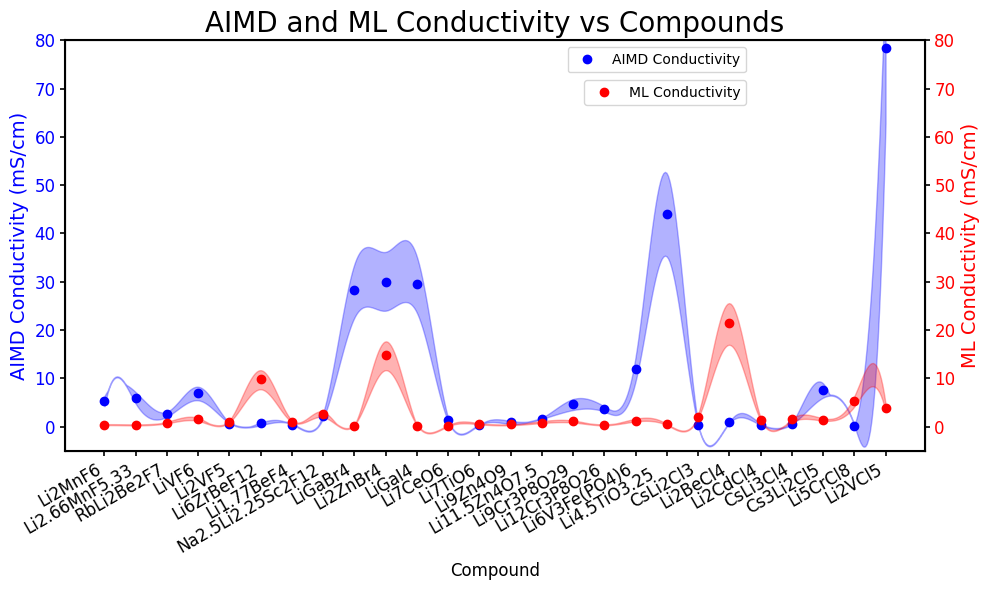

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

# Load data
df = pd.read_csv('Cond-Ea.csv')

# Check for missing values
print(df.isnull().sum())

 
AIMD_Conductivity = df['AIMD_Conductivity']
ML_Conductivity = df['ML_Conductivity']
compound = df['compound'].astype(str)  # Ensure compound names are strings

 
fig, ax1 = plt.subplots(figsize=(10, 6))   

# Increase border width
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)

# Plot AIMD_Conductivity with dots
ax1.plot(compound, AIMD_Conductivity, color='blue', marker='o', linestyle='None', label='AIMD Conductivity')
ax1.set_xlabel('Compound', fontsize=12)   
ax1.set_ylabel('AIMD Conductivity (mS/cm)', color='blue', fontsize=14)   
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)  

 
ax2 = ax1.twinx()
ax2.plot(compound, ML_Conductivity, color='red', marker='o', linestyle='None', label='ML Conductivity')
ax2.set_ylabel('ML Conductivity (mS/cm)', color='red', fontsize=14)   
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)   

 
ax1.set_ylim(-5, 80)
ax2.set_ylim(-5, 80)
 
x_values = np.arange(len(compound))   
combined_lower_AIMD = AIMD_Conductivity * 0.8
combined_upper_AIMD = AIMD_Conductivity * 1.2

combined_lower_ML = ML_Conductivity * 0.8
combined_upper_ML = ML_Conductivity * 1.2

 
spline_lower_AIMD = UnivariateSpline(x_values, combined_lower_AIMD, s=0.5)
spline_upper_AIMD = UnivariateSpline(x_values, combined_upper_AIMD, s=0.5)

spline_lower_ML = UnivariateSpline(x_values, combined_lower_ML, s=0.5)
spline_upper_ML = UnivariateSpline(x_values, combined_upper_ML, s=0.5)
 
x_smooth = np.linspace(0, len(compound) - 1, 500)
lower_smooth_AIMD = spline_lower_AIMD(x_smooth)
upper_smooth_AIMD = spline_upper_AIMD(x_smooth)

lower_smooth_ML = spline_lower_ML(x_smooth)
upper_smooth_ML = spline_upper_ML(x_smooth)

 
upper_smooth_AIMD = np.maximum(upper_smooth_AIMD, lower_smooth_AIMD + 0.2)
upper_smooth_ML = np.maximum(upper_smooth_ML, lower_smooth_ML + 0.2)

 
ax1.fill_between(x_smooth, lower_smooth_AIMD, upper_smooth_AIMD, color='blue', alpha=0.3)
ax2.fill_between(x_smooth, lower_smooth_ML, upper_smooth_ML, color='red', alpha=0.3)

 
ax1.set_xticks(np.arange(len(compound)))  
ax1.set_xticklabels(compound, rotation=30, fontsize=12, ha='right')   
 
ax1.tick_params(axis='x', width=1.2)  
ax1.tick_params(axis='y', width=1.2)   
ax2.tick_params(axis='y', width=1.2)   
  
 
plt.title('AIMD and ML Conductivity vs Compounds', fontsize=20)   
ax1.legend(loc='upper right' , bbox_to_anchor=(0.8, 1))
ax2.legend(loc='upper right' , bbox_to_anchor=(0.8, 0.92))


 
fig.subplots_adjust(bottom=0.2)   

plt.savefig('conductivity_vs_compound2.png', format='png', dpi=300)   

 
plt.tight_layout()  
plt.show()